In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pickle as pkl 


In [14]:
data = np.load(r'C:\Users\AMEEN\bsm-2-python-lin-opt\Updated Progress files\Data\data_bsm2_4exe_newhighprob.npz')
features = data['features'].astype(np.float32)
targets = data['targets'].astype(np.float32)


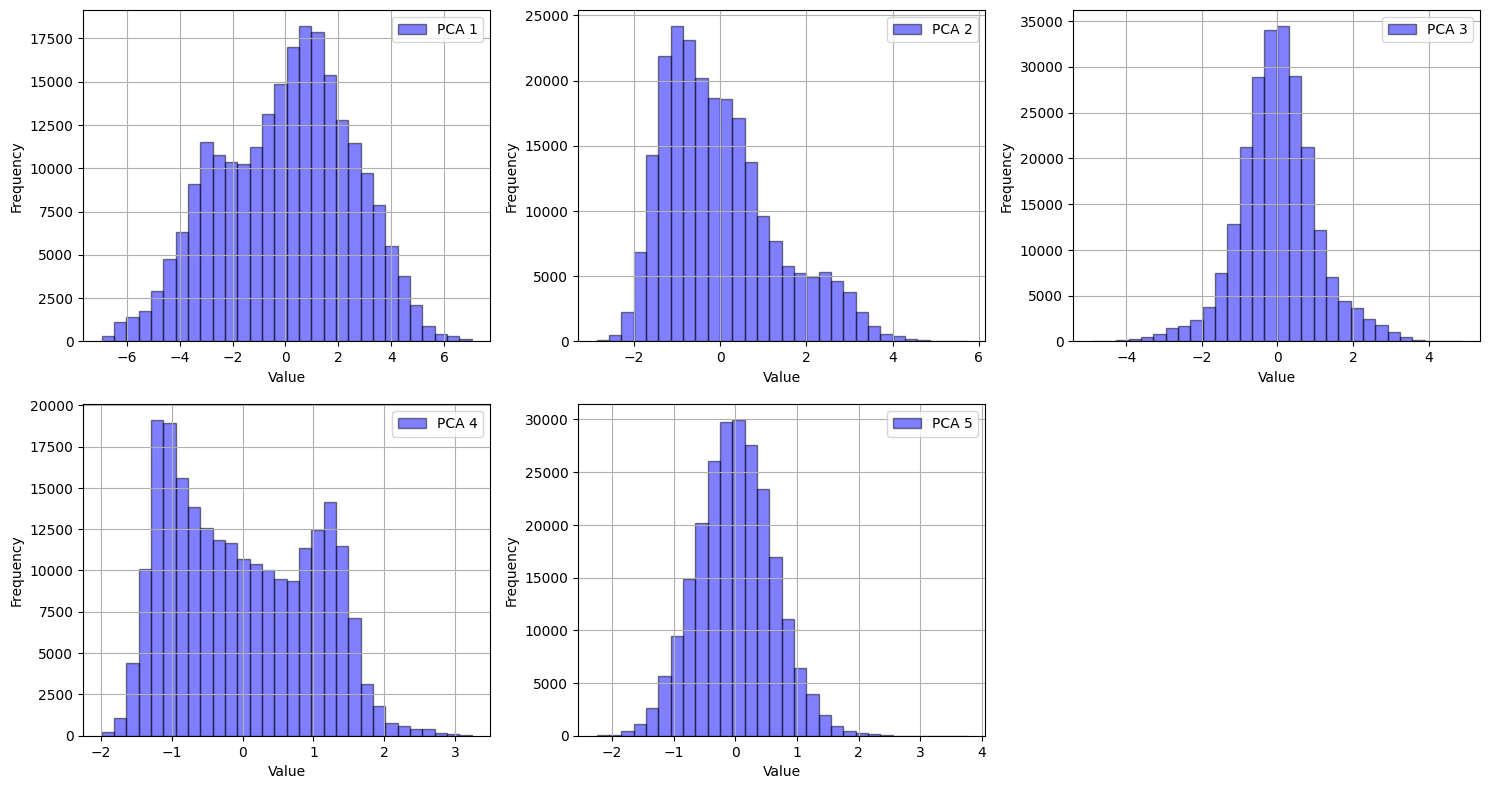

In [30]:


def plot_distributions(data, columns=[1, 2, 3, 4, 5], bins=30):
 
    num_plots = len(columns)
    rows = (num_plots // 3) + (1 if num_plots % 3 else 0)  # 3 plots per row
    plt.figure(figsize=(15, 8))
    
    for idx, col in enumerate(columns, start=1):
        plt.subplot(rows, 3, idx)
        
        # Plot actual data as a histogram with a solid line
        plt.hist(data[:, col], bins=bins, alpha=0.5, label=f'PCA {col}', color='blue', edgecolor='black')
    
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()


plot_distributions(features, columns=[1, 2, 3, 4, 5])


In [31]:
def detect_outliers(data, columns=8):
    outlier_info = {}
    
    for col in range(columns):
        # Get column data
        column_data = data[:, col]
        
        # Calculate Q1, Q3, and IQR
        Q1 = np.percentile(column_data, 25)
        Q3 = np.percentile(column_data, 75)
        IQR = Q3 - Q1
        
        # Calculate outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
        outlier_indices = np.where((column_data < lower_bound) | (column_data > upper_bound))[0]
        
        # Store information
        outlier_info[f'Column_{col}'] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'n_outliers': len(outliers),
            'outlier_indices': outlier_indices,
            'outlier_values': outliers
        }
    
    return outlier_info


def plot_outliers(data, columns=[1,2,3,4,5]):
   
    plt.figure(figsize=(15, 6))
    plt.boxplot([data[:, i] for i in columns], positions=range(1, len(columns) + 1))
    plt.title('Box Plot: Outliers of PCA Components')
    plt.xlabel('PCA Components')
    plt.ylabel('Boundaries')
    plt.grid(True)
    
    # Calculate and display statistics
    for idx, col in enumerate(columns, start=1):
        col_data = data[:, col]
        
        # Calculate statistics
        max_val = np.max(col_data)
        min_val = np.min(col_data)
        median_val = np.median(col_data)
        mean_val = np.mean(col_data)
        
        # Display values on the plot
        plt.text(idx, max_val, f'Max:{max_val:.2f}', ha='center', va='bottom', color='blue')
        plt.text(idx, min_val, f'Min:{min_val:.2f}', ha='center', va='top', color='red')
        plt.text(idx, median_val, f'Median:{median_val:.2f}', ha='center', va='center', color='green')
        #plt.text(idx, mean_val, f'Mean:{mean_val:.2f}', ha='center', va='center', color='purple')
    
    plt.show()




In [ ]:

outliers = detect_outliers(features)

for col, info in outliers.items():
    print(f"\n{col}:")
    print(f"Number of outliers: {info['n_outliers']}")
    print(f"Bounds: [{info['lower_bound']:.2f}, {info['upper_bound']:.2f}]")


Column_0:
Number of outliers: 0
Bounds: [-210.00, 510.00]

Column_1:
Number of outliers: 0
Bounds: [-7.48, 7.37]

Column_2:
Number of outliers: 3640
Bounds: [-3.56, 3.27]

Column_3:
Number of outliers: 9752
Bounds: [-2.38, 2.36]

Column_4:
Number of outliers: 0
Bounds: [-3.58, 3.58]

Column_5:
Number of outliers: 2008
Bounds: [-1.65, 1.64]

Column_6:
Number of outliers: 0
Bounds: [-210.00, 510.00]

Column_7:
Number of outliers: 0
Bounds: [-7.48, 7.37]


: 

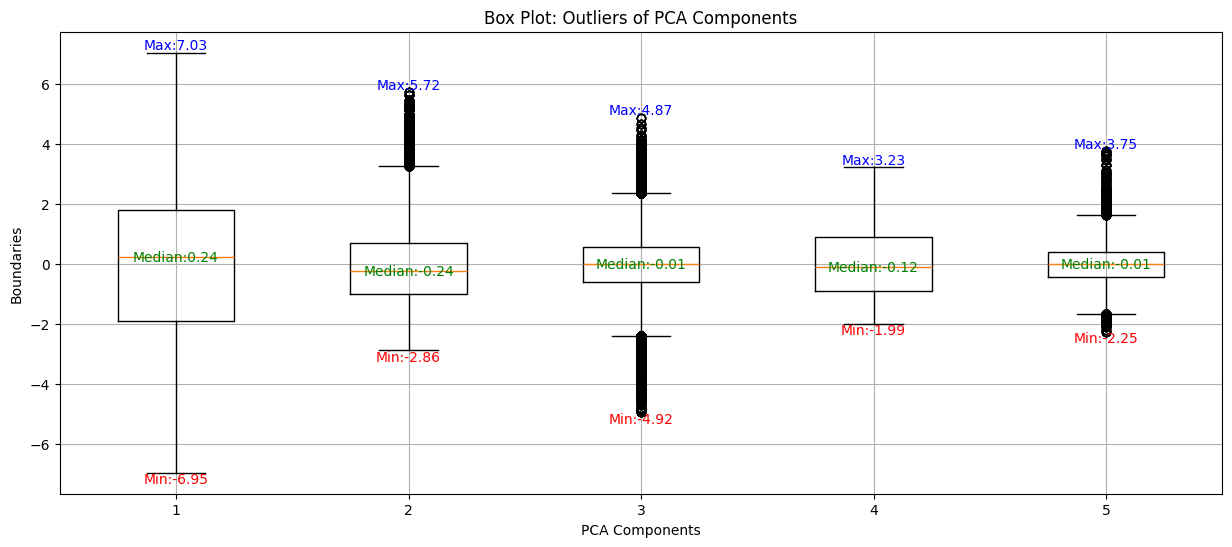

In [33]:
# Create the visualization
plot_outliers(features)

In [ ]:
def detect_outliers_zscore(data, columns=8, threshold=3):
  
    outlier_info = {}
    
    for col in range(columns):
        # Get column data
        column_data = data[:, col]
        
        # Calculate z-scores
        mean = np.mean(column_data)
        std = np.std(column_data)
        z_scores = np.abs((column_data - mean) / std)
        
        # Find outliers
        outlier_indices = np.where(z_scores > threshold)[0]
        outliers = column_data[outlier_indices]
        
        # Store information
        outlier_info[f'Column_{col}'] = {
            'mean': mean,
            'std': std,
            'threshold': threshold,
            'lower_bound': mean - (threshold * std),
            'upper_bound': mean + (threshold * std),
            'n_outliers': len(outliers),
            'outlier_indices': outlier_indices,
            'outlier_values': outliers,
            'z_scores': z_scores[outlier_indices]
        }
    
    return outlier_info

def plot_outliers_zscore(data, columns=8):
  
    n_cols = min(columns, data.shape[1])
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.ravel()
    
    for col in range(n_cols):
        # Calculate z-scores
        mean = np.mean(data[:, col])
        std = np.std(data[:, col])
        z_scores = np.abs((data[:, col] - mean) / std)
        
        # Create scatter plot
        axes[col].scatter(range(len(data[:, col])), z_scores, alpha=0.5)
        axes[col].axhline(y=3, color='r', linestyle='--', label='Threshold (3σ)')
        axes[col].set_title(f'Column {col} Z-scores')
        axes[col].set_xlabel('Data Point Index')
        axes[col].set_ylabel('|Z-score|')
        axes[col].legend()
        axes[col].grid(True)
    
    plt.tight_layout()
    plt.show()


In [16]:
outliers = detect_outliers_zscore(features)

# Print summary for each column
for col, info in outliers.items():
    print(f"\n{col}:")
    print(f"Number of outliers: {info['n_outliers']}")
    print(f"Bounds: [{info['lower_bound']:.2f}, {info['upper_bound']:.2f}]")
    print(f"Mean: {info['mean']:.2f}")
    print(f"Standard Deviation: {info['std']:.2f}")


Column_0:
Number of outliers: 0
Bounds: [-152.75, 397.39]
Mean: 122.32
Standard Deviation: 91.69

Column_1:
Number of outliers: 0
Bounds: [-7.50, 7.50]
Mean: -0.00
Standard Deviation: 2.50

Column_2:
Number of outliers: 1374
Bounds: [-3.92, 3.93]
Mean: 0.00
Standard Deviation: 1.31

Column_3:
Number of outliers: 3762
Bounds: [-3.10, 3.10]
Mean: -0.00
Standard Deviation: 1.03

Column_4:
Number of outliers: 144
Bounds: [-2.97, 2.97]
Mean: -0.00
Standard Deviation: 0.99

Column_5:
Number of outliers: 1254
Bounds: [-1.86, 1.86]
Mean: -0.00
Standard Deviation: 0.62

Column_6:
Number of outliers: 0
Bounds: [-152.74, 397.39]
Mean: 122.32
Standard Deviation: 91.69

Column_7:
Number of outliers: 0
Bounds: [-7.50, 7.50]
Mean: -0.00
Standard Deviation: 2.50


C:\Users\AMEEN\AppData\Local\Temp\ipykernel_9676\148841721.py:66: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\AMEEN\anaconda3\envs\BSM2\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


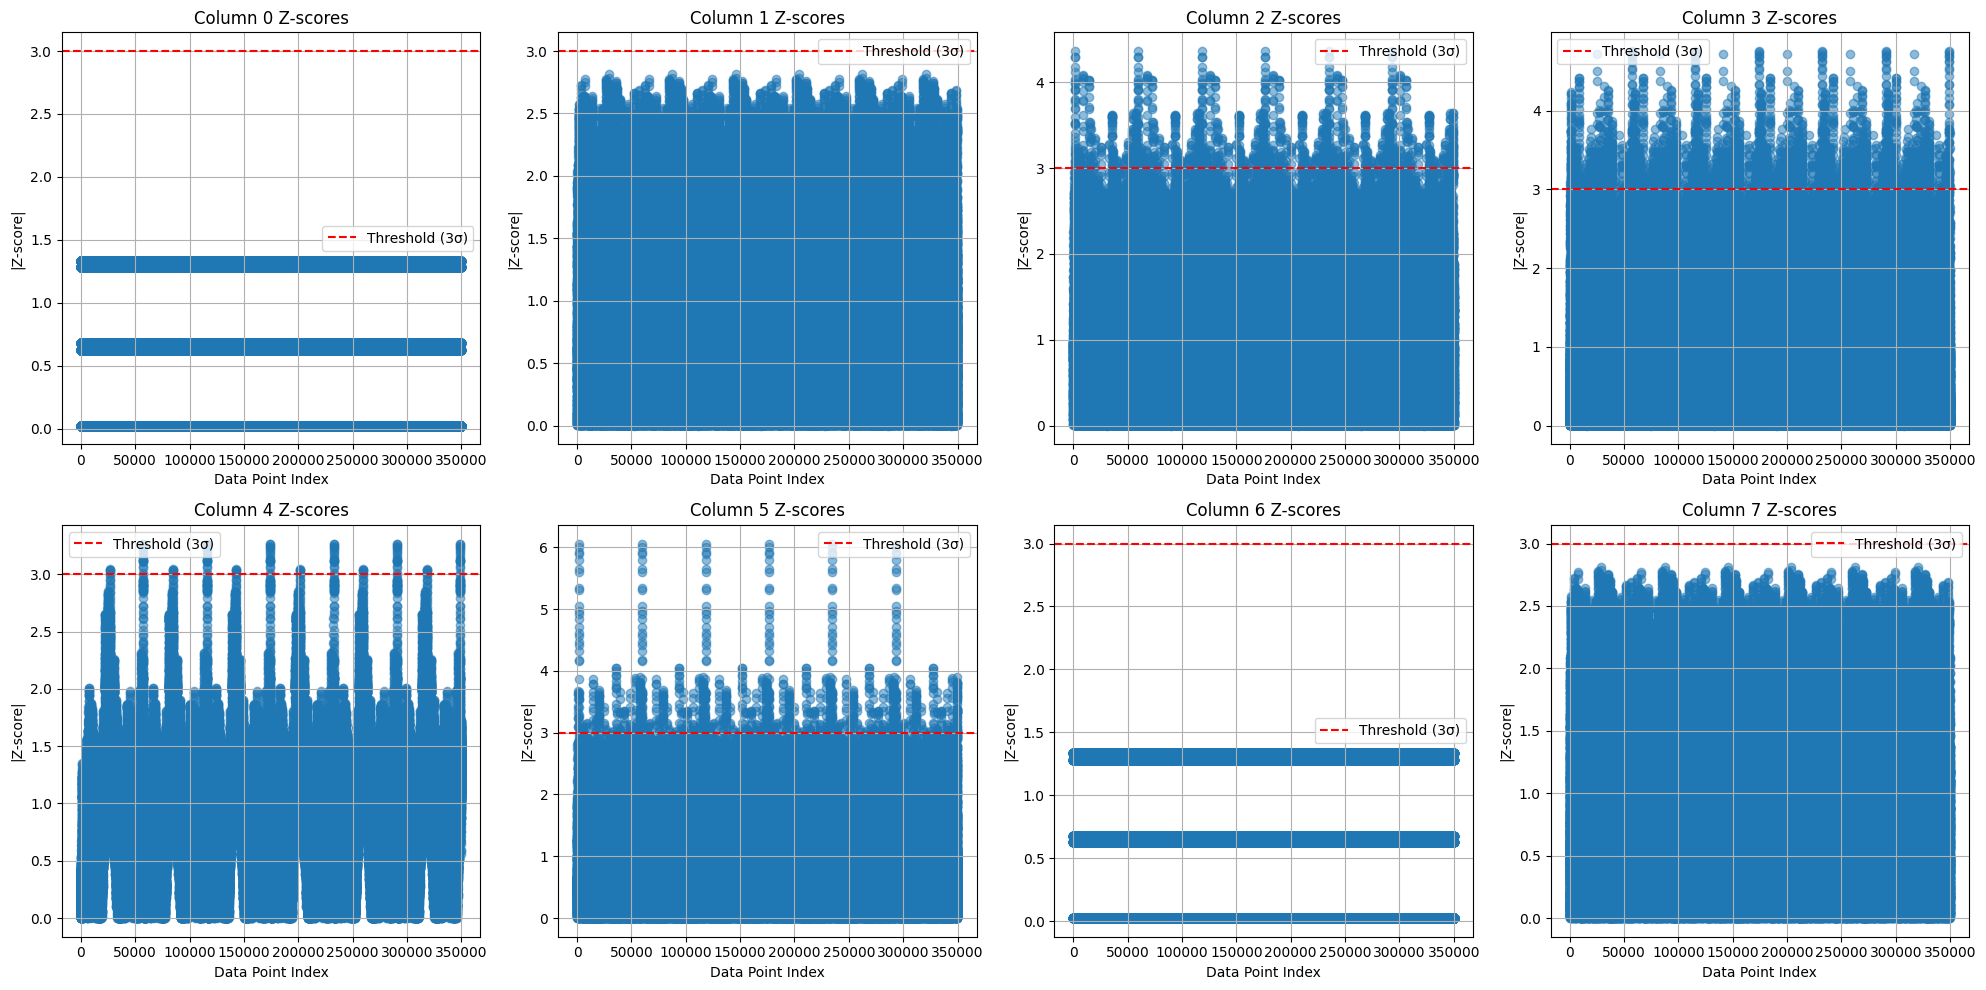

In [18]:
plot_outliers_zscore(features)

In [2]:
import pickle as pkl

# Get loadings for all principal components
def load_scaler_and_pca(filename):
    with open(filename, 'rb') as f:
        scaler, pca = pkl.load(f)
    return scaler, pca
scaler, pca = load_scaler_and_pca(r'C:\Users\AMEEN\bsm-2-python-lin-opt\Updated Progress files\scaler_pca_5_4exe.pkl')

# Assume that the original data had `n_features` features
n_features = scaler.n_features_in_

# Get feature names, if available, or create placeholder names
feature_names = [f'Feature_{i+1}' for i in range(n_features)]

# Get loadings (each column corresponds to a principal component)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=feature_names)

print("PCA Loadings:")
print(loadings[1:])




c:\Users\AMEEN\anaconda3\envs\BSM2\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


PCA Loadings:
                 PC1       PC2       PC3       PC4           PC5
Feature_2   0.345131  0.294208  0.159610 -0.000256 -5.740669e-02
Feature_3   0.362196 -0.232158 -0.251507  0.010413 -2.335646e-02
Feature_4   0.364858 -0.230934 -0.250124  0.009966 -3.293690e-02
Feature_5   0.359836 -0.230818 -0.249156  0.007815 -3.458263e-02
Feature_6  -0.000000  0.000000 -0.000000  0.000000  1.387779e-17
Feature_7  -0.000000  0.000000 -0.000000  0.000000 -1.387779e-17
Feature_8  -0.000000  0.000000 -0.000000  0.000000  0.000000e+00
Feature_9  -0.000000  0.000000 -0.000000  0.000000  0.000000e+00
Feature_10  0.327459  0.289571  0.244552 -0.009924 -6.468875e-02
Feature_11  0.299072  0.287695  0.251018 -0.028593 -2.755752e-01
Feature_12  0.329204  0.298880  0.194654 -0.011082 -5.591457e-02
Feature_13 -0.000000  0.000000 -0.000000  0.000000  0.000000e+00
Feature_14  0.365935 -0.232463 -0.251705  0.009886 -3.152730e-02
Feature_15  0.053903  0.564508 -0.504992  0.081032  6.269829e-01
Feature_16 

c:\Users\AMEEN\anaconda3\envs\BSM2\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
# Sort loadings for PC1 by absolute value
pc1_contributions = loadings['PC2'].sort_values(key=abs, ascending=False)
print("Top features contributing to PC2:")
print(pc1_contributions)


Top features contributing to PC2:
Feature_15    0.564508
Feature_1    -0.331143
Feature_12    0.298880
Feature_2     0.294208
Feature_10    0.289571
Feature_11    0.287695
Feature_14   -0.232463
Feature_3    -0.232158
Feature_4    -0.230934
Feature_5    -0.230818
Feature_16   -0.120931
Feature_7     0.000000
Feature_8     0.000000
Feature_9     0.000000
Feature_6     0.000000
Feature_13    0.000000
Feature_17    0.000000
Feature_18    0.000000
Feature_19    0.000000
Feature_20    0.000000
Feature_21    0.000000
Name: PC2, dtype: float64


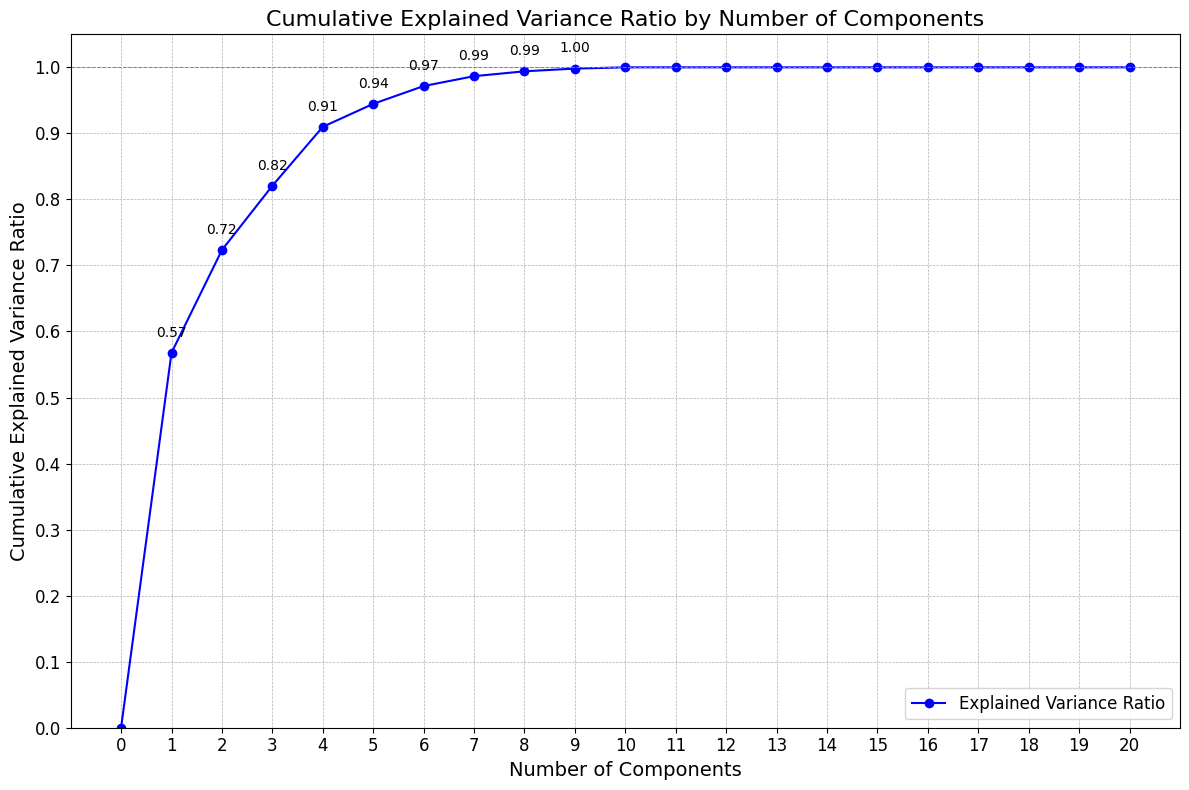

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data
components = np.arange(0, 21)
explained_variance_ratios = [
    0.0,
    0.5677561673482467,
    0.7233859773485296,
    0.8206991711572343,
    0.9099258661495585,
    0.9447172984427936,
    0.9716933905427165,
    0.9866381670953569,
    0.9940071279109922,
    0.998133720101466,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0
]

# Plot
plt.figure(figsize=(12, 8))
plt.plot(components, explained_variance_ratios, marker='o', linestyle='-', color='b', label='Explained Variance Ratio')

# Add text annotations for each point
threshold = 0.05  # Only show text for values above this threshold
for i, evr in enumerate(explained_variance_ratios):
    if evr > threshold and evr < 1.0:
        plt.text(components[i], evr + 0.02, f'{evr:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance Ratio', fontsize=14)
plt.title('Cumulative Explained Variance Ratio by Number of Components', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(components, fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=12)
plt.ylim(0, 1.05)

# Add a legend
plt.legend(loc='lower right', fontsize=12)

# Add a horizontal line at y=1 for reference
plt.axhline(y=1, color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

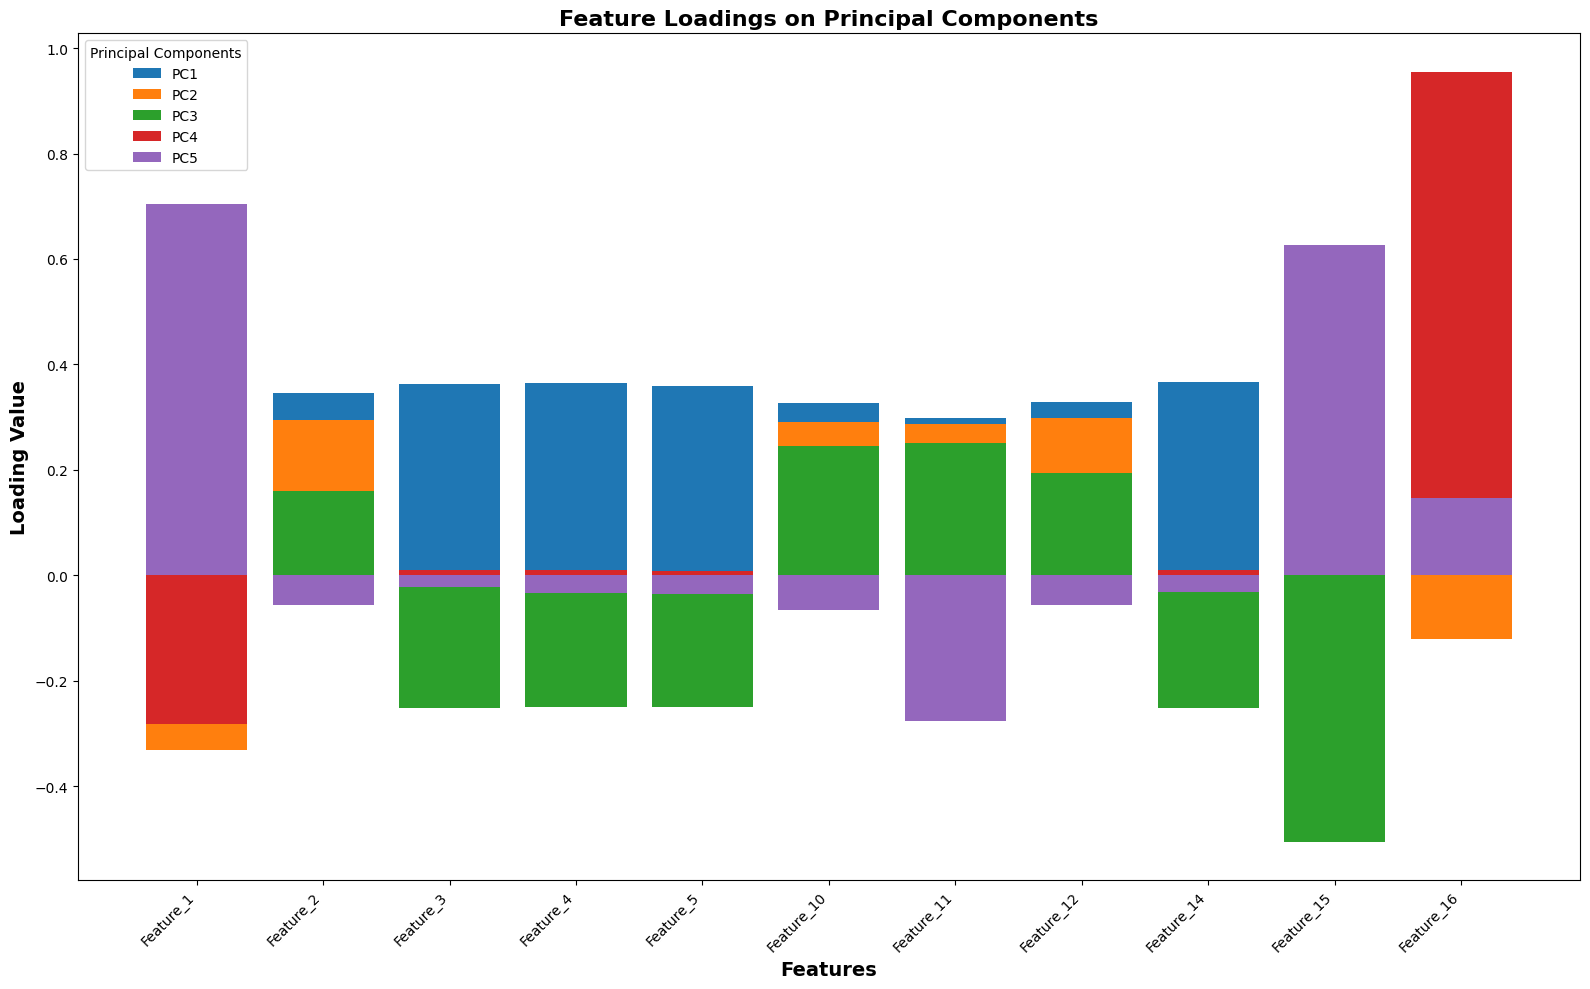

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Feature': ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_14', 'Feature_15', 'Feature_16'],
    'PC1': [0.205, 0.345, 0.362, 0.365, 0.360, 0.327, 0.299, 0.329, 0.366, 0.054, 0.057],
    'PC2': [-0.331, 0.294, -0.232, -0.231, -0.231, 0.290, 0.288, 0.299, -0.232, 0.565, -0.121],
    'PC3': [0.511, 0.160, -0.252, -0.250, -0.249, 0.245, 0.251, 0.195, -0.252, -0.505, 0.216],
    'PC4': [-0.281, 0.000, 0.010, 0.010, 0.008, -0.010, -0.029, -0.011, 0.010, 0.081, 0.955],
    'PC5': [0.704, -0.057, -0.023, -0.033, -0.035, -0.065, -0.276, -0.056, -0.032, 0.627, 0.146]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(16, 10))

# Plot each principal component as a separate bar plot
for i, pc in enumerate(['PC1', 'PC2', 'PC3', 'PC4', 'PC5']):
    plt.bar(df['Feature'], df[pc], label=pc)

# Add labels and title
plt.xlabel('Features', fontsize=14, fontweight='bold')
plt.ylabel('Loading Value', fontsize=14, fontweight='bold')
plt.title('Feature Loadings on Principal Components', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Principal Components')

# Show the plot
plt.tight_layout()
plt.show()

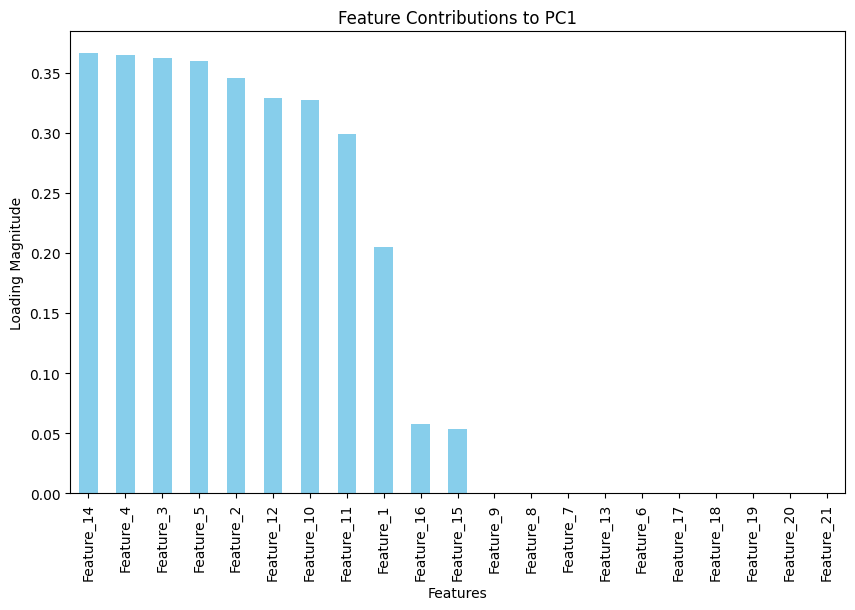

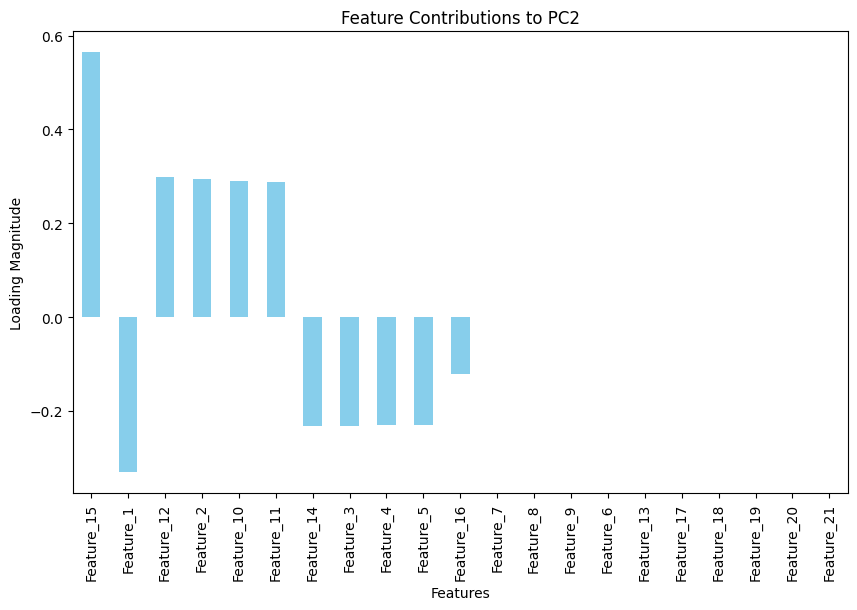

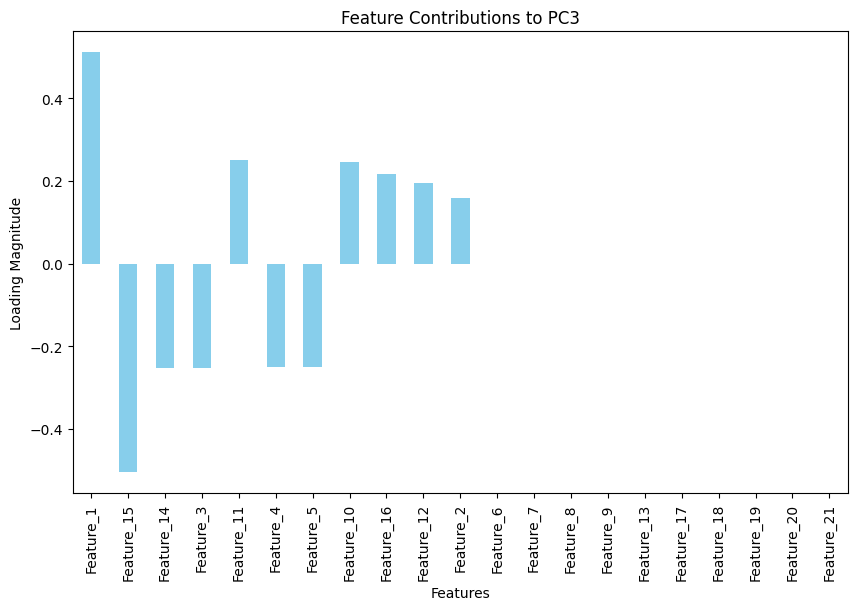

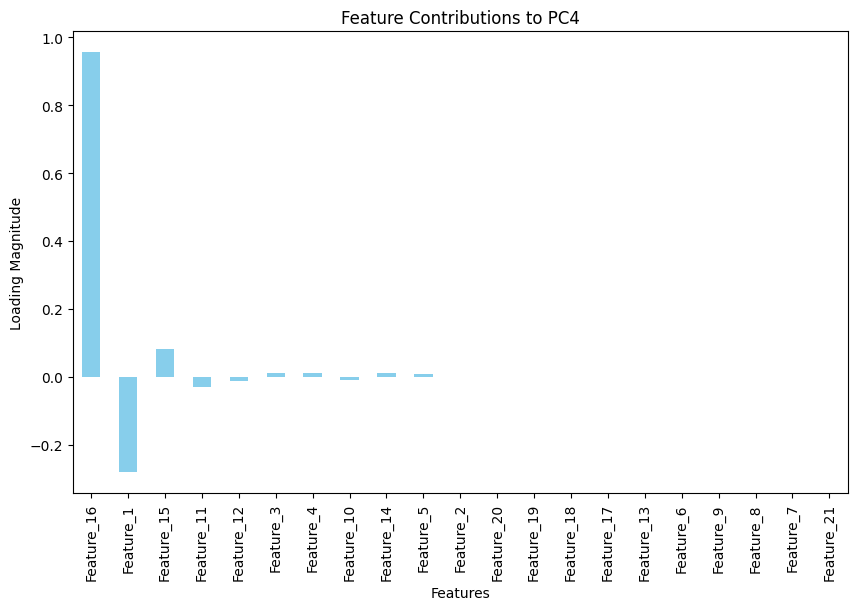

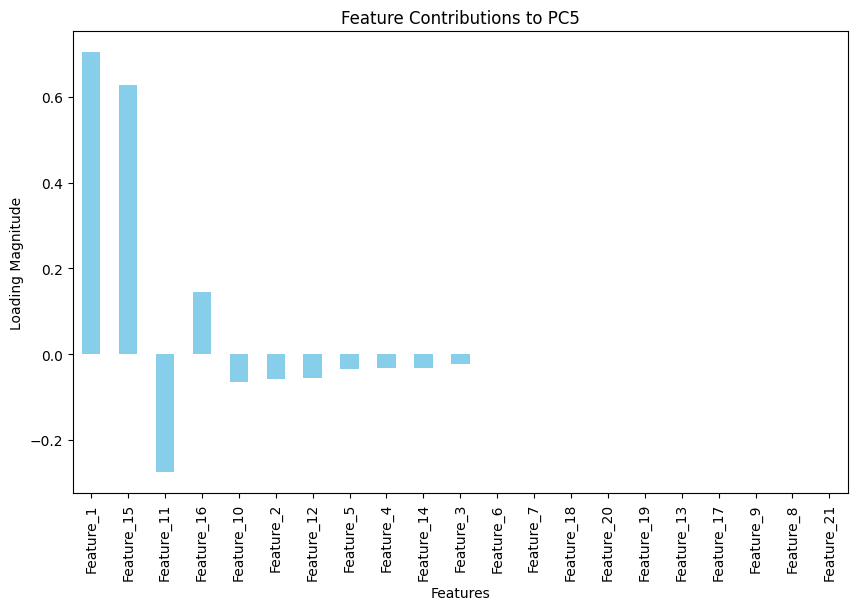

In [6]:
import matplotlib.pyplot as plt

# Plot loadings for each principal component
for i in range(pca.n_components_):
    pc = f'PC{i+1}'
    plt.figure(figsize=(10, 6))
    loadings[pc].sort_values(key=abs, ascending=False).plot(kind='bar', color='skyblue')
    plt.title(f'Feature Contributions to {pc}')
    plt.xlabel('Features')
    plt.ylabel('Loading Magnitude')
    plt.show()


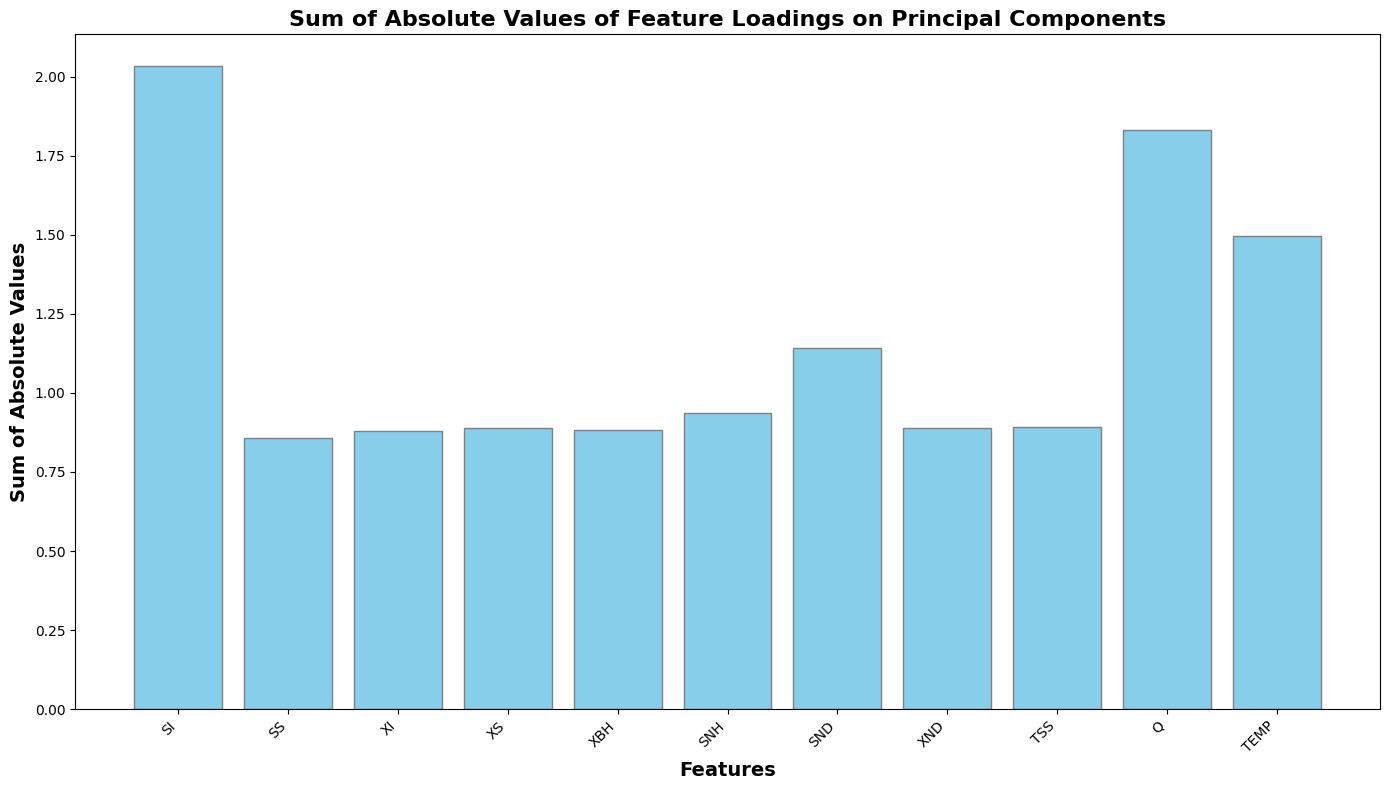

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Feature': ['SI', 'SS', 'XI', 'XS', 'XBH', 'SNH', 'SND', 'XND', 'TSS', 'Q', 'TEMP'],
    'Sum of Absolute Values': [2.031869, 0.856612, 0.87963, 0.888819, 0.882208, 0.936195, 1.141953, 0.889735, 0.891516, 1.831418, 1.495005]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(14, 8))

# Create the bar plot
plt.bar(df['Feature'], df['Sum of Absolute Values'], color='skyblue', edgecolor='grey')

# Add labels and title
plt.xlabel('Features', fontsize=14, fontweight='bold')
plt.ylabel('Sum of Absolute Values', fontsize=14, fontweight='bold')
plt.title('Sum of Absolute Values of Feature Loadings on Principal Components', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
loadings_sorted

,PC1,PC2,PC3,PC4,PC5
Feature_1,0.365935,0.564508,0.510970,0.955490,7.037987e-01
Feature_2,0.364858,-0.331143,-0.504992,-0.281189,6.269829e-01
Feature_3,0.362196,0.298880,-0.251705,0.081032,-2.755752e-01
Feature_4,0.359836,0.294208,-0.251507,-0.028593,1.455721e-01
Feature_5,0.345131,0.289571,0.251018,-0.011082,-6.468875e-02
Feature_6,0.329204,0.287695,-0.250124,0.010413,-5.740669e-02
Feature_7,0.327459,-0.232463,-0.249156,0.009966,-5.591457e-02
Feature_8,0.299072,-0.232158,0.244552,-0.009924,-3.458263e-02
Feature_9,0.204768,-0.230934,0.215543,0.009886,-3.293690e-02
Feature_10,0.057469,-0.230818,0.194654,0.007815,-3.152730e-02


In [9]:
import numpy as np 
raw_data = np.load(r'C:\Users\AMEEN\bsm-2-python-lin-opt\Updated Progress files\data_bsm2_4exe_1728.npz')
raw_features = raw_data['features'].astype(np.float32)
raw_targets = raw_data['targets'].astype(np.float32)


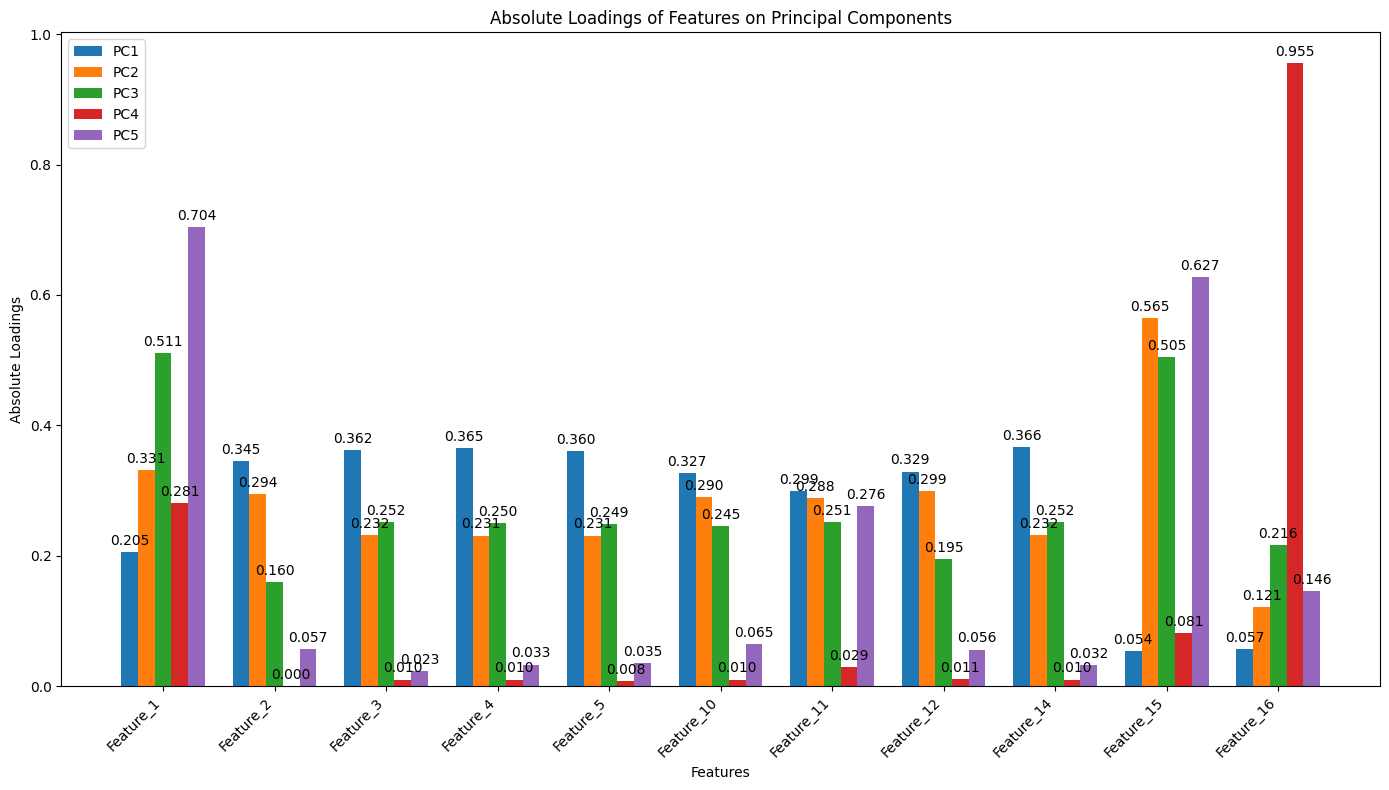

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
features = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_14', 'Feature_15', 'Feature_16']
pc1 = [0.205, 0.345, 0.362, 0.365, 0.360, 0.327, 0.299, 0.329, 0.366, 0.054, 0.057]
pc2 = [0.331, 0.294, 0.232, 0.231, 0.231, 0.290, 0.288, 0.299, 0.232, 0.565, 0.121]
pc3 = [0.511, 0.160, 0.252, 0.250, 0.249, 0.245, 0.251, 0.195, 0.252, 0.505, 0.216]
pc4 = [0.281, 0.000, 0.010, 0.010, 0.008, 0.010, 0.029, 0.011, 0.010, 0.081, 0.955]
pc5 = [0.704, 0.057, 0.023, 0.033, 0.035, 0.065, 0.276, 0.056, 0.032, 0.627, 0.146]

# Plot
x = np.arange(len(features))
width = 0.15

fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - 2*width, pc1, width, label='PC1')
bars2 = ax.bar(x - width, pc2, width, label='PC2')
bars3 = ax.bar(x, pc3, width, label='PC3')
bars4 = ax.bar(x + width, pc4, width, label='PC4')
bars5 = ax.bar(x + 2*width, pc5, width, label='PC5')

# Add text annotations
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)
add_labels(bars5)

# Labels and title
ax.set_xlabel('Features')
ax.set_ylabel('Absolute Loadings')
ax.set_title('Absolute Loadings of Features on Principal Components')
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

C:\Users\AMEEN\AppData\Local\Temp\ipykernel_23396\1913814366.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(features))


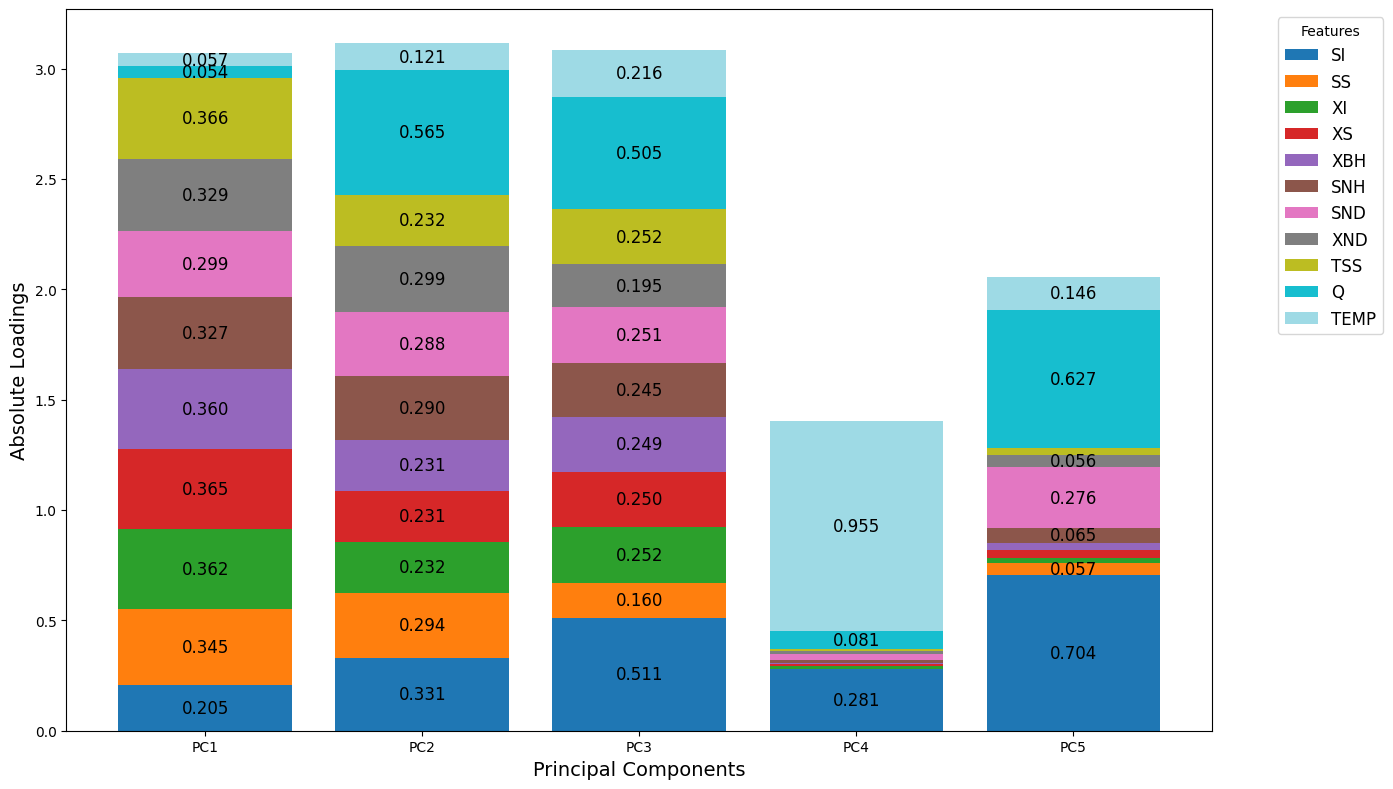

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Data
pcs = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
features = ['SI', 'SS', 'XI', 'XS', 'XBH', 'SNH', 'SND', 'XND', 'TSS', 'Q', 'TEMP']
data = {
    'SI': [0.205, 0.331, 0.511, 0.281, 0.704],
    'SS': [0.345, 0.294, 0.160, 0.000, 0.057],
    'XI': [0.362, 0.232, 0.252, 0.010, 0.023],
    'XS': [0.365, 0.231, 0.250, 0.010, 0.033],
    'XBH': [0.360, 0.231, 0.249, 0.008, 0.035],
    'SNH': [0.327, 0.290, 0.245, 0.010, 0.065],
    'SND': [0.299, 0.288, 0.251, 0.029, 0.276],
    'XND': [0.329, 0.299, 0.195, 0.011, 0.056],
    'TSS': [0.366, 0.232, 0.252, 0.010, 0.032],
    'Q': [0.054, 0.565, 0.505, 0.081, 0.627],
    'TEMP': [0.057, 0.121, 0.216, 0.955, 0.146]
}

# Convert data to numpy array for easier manipulation
data_array = np.array([data[feature] for feature in features])

# Define a color map
colors = cm.get_cmap('tab20', len(features))

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

# Create stacked bars
bottom = np.zeros(len(pcs))
for i, feature in enumerate(features):
    ax.bar(pcs, data_array[i], bottom=bottom, label=feature, color=colors(i))
    bottom += data_array[i]

# Add text annotations
threshold = 0.05  # Only show text for values above this threshold
for i, pc in enumerate(pcs):
    cumulative = 0
    for j, feature in enumerate(features):
        value = data_array[j, i]
        cumulative += value
        if value > threshold:
            ax.text(i, cumulative - value / 2, f'{value:.3f}', ha='center', va='center', fontsize=12, color='black')

# Labels and title
ax.set_xlabel('Principal Components', fontsize=14)
ax.set_ylabel('Absolute Loadings', fontsize=14)
#ax.set_title('Absolute Loadings of Features on Principal Components', fontsize=14)
ax.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\AMEEN\AppData\Local\Temp\ipykernel_6404\3028861366.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(features))


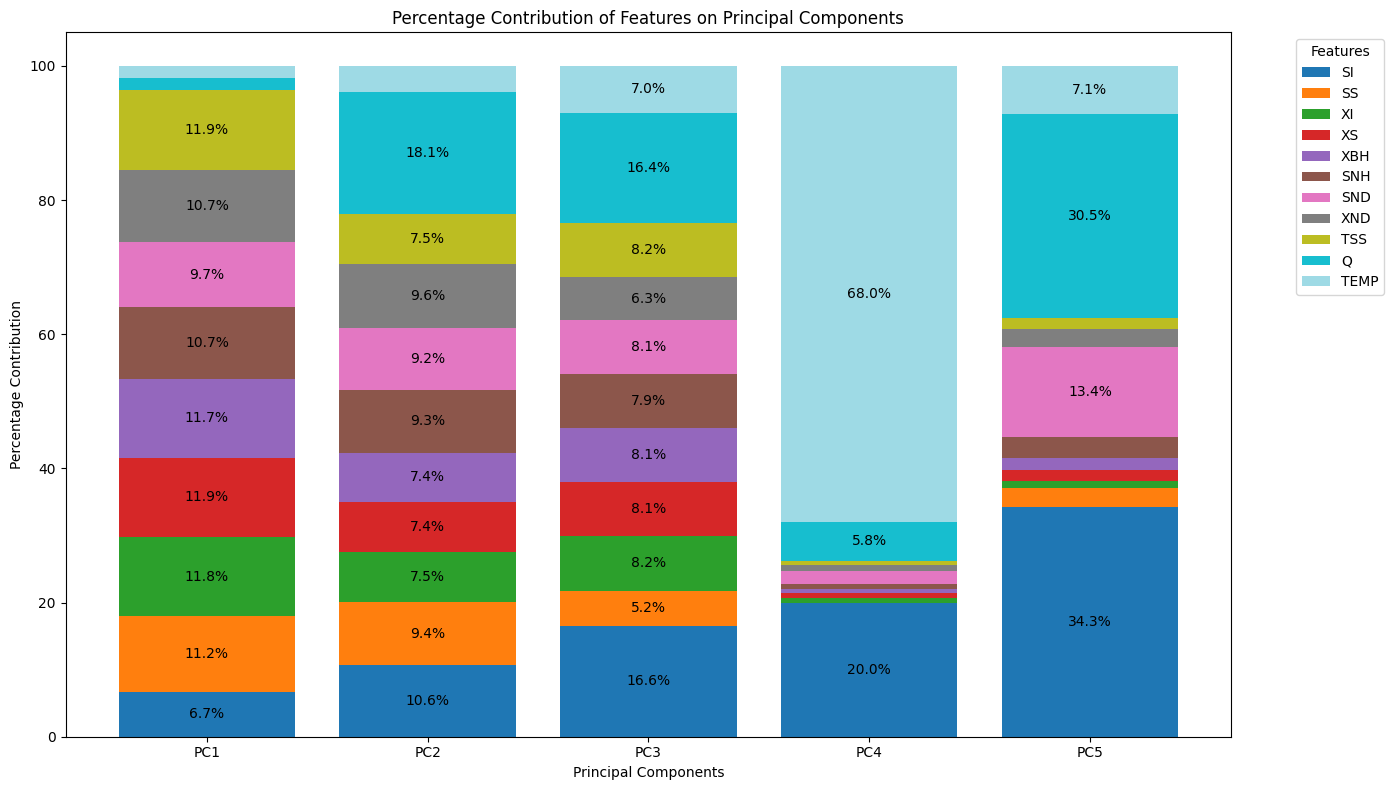

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Data
pcs = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
features = ['SI', 'SS', 'XI', 'XS', 'XBH', 'SNH', 'SND', 'XND', 'TSS', 'Q', 'TEMP']
data = {
    'SI': [0.205, 0.331, 0.511, 0.281, 0.704],
    'SS': [0.345, 0.294, 0.160, 0.000, 0.057],
    'XI': [0.362, 0.232, 0.252, 0.010, 0.023],
    'XS': [0.365, 0.231, 0.250, 0.010, 0.033],
    'XBH': [0.360, 0.231, 0.249, 0.008, 0.035],
    'SNH': [0.327, 0.290, 0.245, 0.010, 0.065],
    'SND': [0.299, 0.288, 0.251, 0.029, 0.276],
    'XND': [0.329, 0.299, 0.195, 0.011, 0.056],
    'TSS': [0.366, 0.232, 0.252, 0.010, 0.032],
    'Q': [0.054, 0.565, 0.505, 0.081, 0.627],
    'TEMP': [0.057, 0.121, 0.216, 0.955, 0.146]
}

# Convert data to numpy array for easier manipulation
data_array = np.array([data[feature] for feature in features])

# Calculate percentages
data_percentage = data_array / data_array.sum(axis=0) * 100

# Define a color map
colors = cm.get_cmap('tab20', len(features))

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

# Create stacked bars
bottom = np.zeros(len(pcs))
for i, feature in enumerate(features):
    ax.bar(pcs, data_percentage[i], bottom=bottom, label=feature, color=colors(i))
    bottom += data_percentage[i]

# Add text annotations
threshold = 5  # Only show text for percentages above this threshold
for i, pc in enumerate(pcs):
    cumulative = 0
    for j, feature in enumerate(features):
        value = data_percentage[j, i]
        cumulative += value
        if value > threshold:
            ax.text(i, cumulative - value / 2, f'{value:.1f}%', ha='center', va='center')

# Labels and title
ax.set_xlabel('Principal Components')
ax.set_ylabel('Percentage Contribution')
ax.set_title('Percentage Contribution of Features on Principal Components')
ax.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

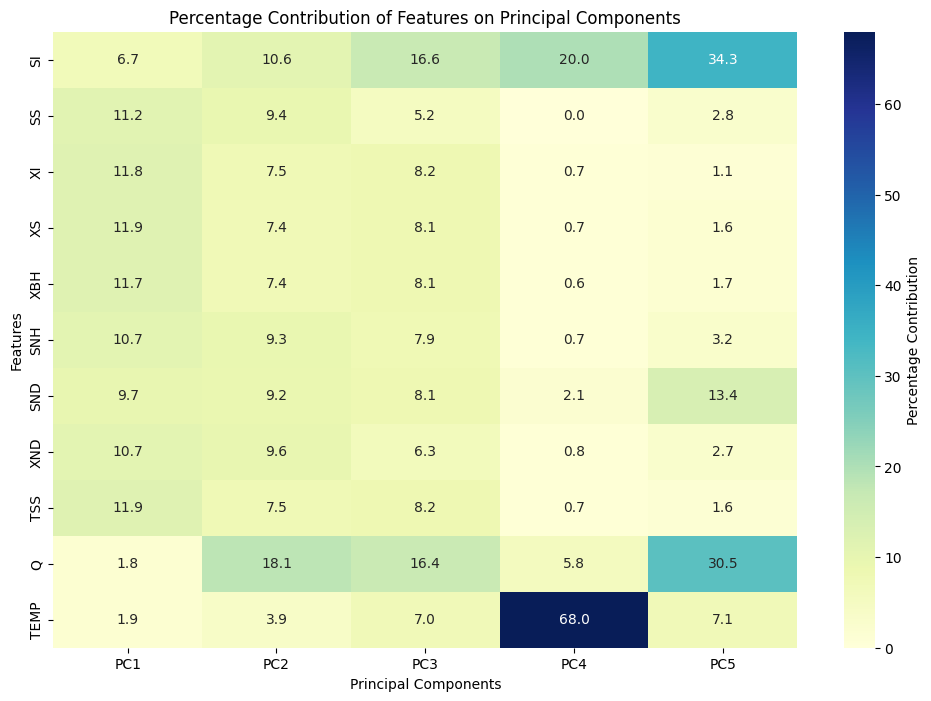

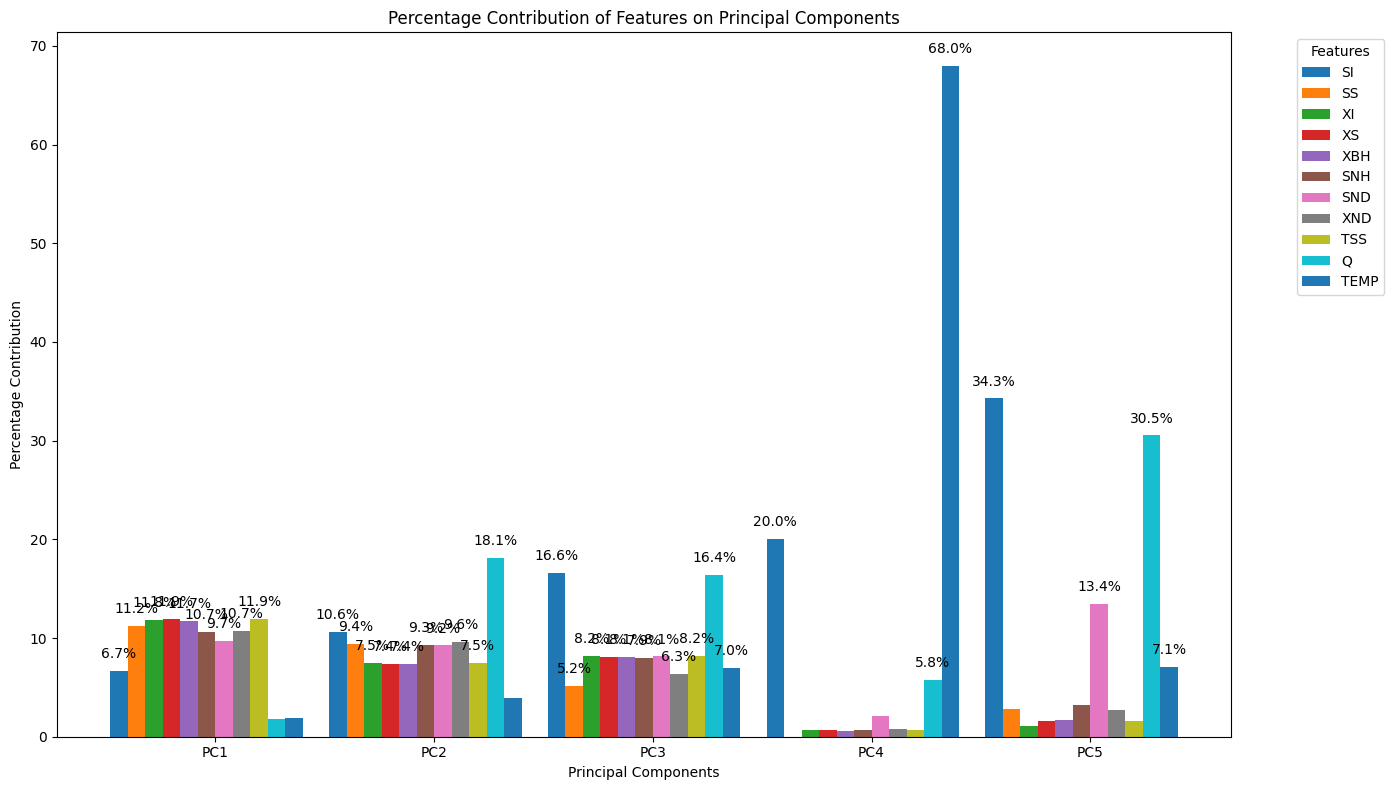

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data
pcs = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
features = ['SI', 'SS', 'XI', 'XS', 'XBH', 'SNH', 'SND', 'XND', 'TSS', 'Q', 'TEMP']
data = {
    'SI': [0.205, 0.331, 0.511, 0.281, 0.704],
    'SS': [0.345, 0.294, 0.160, 0.000, 0.057],
    'XI': [0.362, 0.232, 0.252, 0.010, 0.023],
    'XS': [0.365, 0.231, 0.250, 0.010, 0.033],
    'XBH': [0.360, 0.231, 0.249, 0.008, 0.035],
    'SNH': [0.327, 0.290, 0.245, 0.010, 0.065],
    'SND': [0.299, 0.288, 0.251, 0.029, 0.276],
    'XND': [0.329, 0.299, 0.195, 0.011, 0.056],
    'TSS': [0.366, 0.232, 0.252, 0.010, 0.032],
    'Q': [0.054, 0.565, 0.505, 0.081, 0.627],
    'TEMP': [0.057, 0.121, 0.216, 0.955, 0.146]
}

# Convert data to numpy array for easier manipulation
data_array = np.array([data[feature] for feature in features])

# Calculate percentages
data_percentage = data_array / data_array.sum(axis=0) * 100

# Create a DataFrame for seaborn
import pandas as pd
df = pd.DataFrame(data_percentage, index=features, columns=pcs)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Percentage Contribution'})
plt.title('Percentage Contribution of Features on Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()
import matplotlib.pyplot as plt
import numpy as np

# Data
pcs = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
features = ['SI', 'SS', 'XI', 'XS', 'XBH', 'SNH', 'SND', 'XND', 'TSS', 'Q', 'TEMP']
data = {
    'SI': [0.205, 0.331, 0.511, 0.281, 0.704],
    'SS': [0.345, 0.294, 0.160, 0.000, 0.057],
    'XI': [0.362, 0.232, 0.252, 0.010, 0.023],
    'XS': [0.365, 0.231, 0.250, 0.010, 0.033],
    'XBH': [0.360, 0.231, 0.249, 0.008, 0.035],
    'SNH': [0.327, 0.290, 0.245, 0.010, 0.065],
    'SND': [0.299, 0.288, 0.251, 0.029, 0.276],
    'XND': [0.329, 0.299, 0.195, 0.011, 0.056],
    'TSS': [0.366, 0.232, 0.252, 0.010, 0.032],
    'Q': [0.054, 0.565, 0.505, 0.081, 0.627],
    'TEMP': [0.057, 0.121, 0.216, 0.955, 0.146]
}

# Convert data to numpy array for easier manipulation
data_array = np.array([data[feature] for feature in features])

# Calculate percentages
data_percentage = data_array / data_array.sum(axis=0) * 100

# Plot
x = np.arange(len(pcs))
width = 0.08

fig, ax = plt.subplots(figsize=(14, 8))

# Create grouped bars
for i, feature in enumerate(features):
    ax.bar(x + i*width - (len(features)/2)*width, data_percentage[i], width, label=feature)

# Add text annotations
threshold = 5  # Only show text for percentages above this threshold
for i, pc in enumerate(pcs):
    for j, feature in enumerate(features):
        value = data_percentage[j, i]
        if value > threshold:
            ax.text(i + j*width - (len(features)/2)*width, value + 1, f'{value:.1f}%', ha='center', va='bottom')

# Labels and title
ax.set_xlabel('Principal Components')
ax.set_ylabel('Percentage Contribution')
ax.set_title('Percentage Contribution of Features on Principal Components')
ax.set_xticks(x)
ax.set_xticklabels(pcs)
ax.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()